<a href="https://colab.research.google.com/github/DavidSchneider47/ALIrecommendation/blob/main/Setellite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install earthengine-api --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for earthengine-api: filename=earthengine_api-0.1.362-py3-none-any.whl size=275176 sha256=64b6ff1c5f772caebde8449ef7eb9a7f24aad1e7cd9f84fc6ccd82413bc359c0
  Stored in directory: /root/.cache/pip/wheels/d8/77/2e/483877675dbdb49a9eaae0aa42ecb1fe1e6c2f6e294c1c9d99
Successfully built earthengine-api
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 0.1.361
    Uninstalling earthengine-api-0.1.361:
      Successfully uninstalled earthengine-api-0.1.361


In [7]:
import geopandas as gpd
import ee
# Trigger the authentication flow.
ee.Authenticate()
# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=aeHaUMROCZciAel6HlzktRjmpwemYyy181iAI9C7lK4&tc=t6TnsOXnsLTbVmrf3eVC52SJ66Iy109Z0Q12-YeZMis&cc=Zcse0rHyaUxrYSaVXmUFsQd1RaPMGDweLdQ7YXdNrQg

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1Adeu5BXdhq0Z31SY8iO2cjMF-RZUBbQ3A2-kVBFVPiNXlyq5gT5DB1jTm6c

Successfully saved authorization token.


In [26]:
from google.colab import files
uploaded = files.upload()

Saving buffered_stations.geojson to buffered_stations.geojson


In [27]:
gdf = gpd.read_file('buffered_stations.geojson')

In [31]:
gdf = gdf.dropna(subset=['geometry'])

In [32]:
# Specify the Landsat image collection
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1')


In [33]:
# Loop through each polygon in the GeoJSON file
for index, row in gdf.iterrows():
    # Create an Earth Engine geometry object from the GeoJSON geometry
    aoi = ee.Geometry.Polygon(list(row['geometry'].exterior.coords))

In [37]:
 # Filter the Landsat collection to a single image that intersects the polygon
    # and was collected closest to a certain date. Adjust the date as needed.
  image = landsat.filterBounds(aoi).sort('system:time_start', False).first()


In [38]:
!pip install folium
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11123 sha256=634ec50869a94c8dd42a56827364b2917b017ff5dda06d00cdc145726d74db37
  Stored in directory: /root/.cache/pip/wheels/04/24/fe/140a94a7f1036003ede94579e6b4227fe

Visualizing an Image from the **Dataset**

In [40]:
import folium
import geemap

In [41]:
gdf = gpd.read_file('buffered_stations.geojson')

In [42]:
gdf = gdf.dropna(subset=['geometry'])

In [43]:
# Initialize the Earth Engine module.
ee.Initialize()

# Specify the Landsat image collection
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1')

In [79]:
# Assume you want to get an image for the first station in the dataframe
# Create an Earth Engine geometry object from the GeoJSON geometry
aoi = ee.Geometry.Polygon(list(gdf.loc[2000, 'geometry'].exterior.coords))

In [80]:
# Filter the Landsat collection to a single image that intersects the polygon
# and was collected closest to a certain date. Adjust the date as needed.
image = landsat.filterBounds(aoi).sort('system:time_start', False).first()


In [81]:
# Define the visualization parameters.
vis_params = {
  'bands': ['B4', 'B3', 'B2'], # These are the RGB bands
  'min': 0,
  'max': 3000,
  'gamma': 1.4,
}

In [82]:

# Use folium to visualize the imagery.
mapid = image.getMapId(vis_params)

In [104]:
map = folium.Map(location=[gdf.loc[0, 'geometry'].centroid.y, gdf.loc[500, 'geometry'].centroid.x])
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='median composite',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

In [71]:
property_list = gdf.columns.tolist()
print(property_list)

['Lon', 'Lat', 'Facility N', 'Facility T', 'Primary Mo', 'Street Add', 'City', 'State', 'geometry']


In [100]:
gdf.head()

,Lon,Lat,Facility N,Facility T,Primary Mo,Street Add,City,State,geometry
0,-150.06188,62.18922,Talkeetna Depot,At-Grade Fixed Guideway Station,AR,Mile 13.7 Talkeetna Spur Rd.,Talkeetna,AK,"POLYGON ((-150.05827 62.18922, -150.05828 62.1..."
1,-149.58490,61.10283,Anchorage Airport Bill Sheffield Depot,Elevated Fixed Guideway Station,AR,4980 W Int'L Airport Rd.,Anchorage,AK,"POLYGON ((-149.58129 61.10283, -149.58130 61.1..."
2,-149.53262,61.13180,Anchorage Historic Depot (all inclusive),At-Grade Fixed Guideway Station,AR,401 - 431 1St. Ave.,Anchorage,AK,"POLYGON ((-149.52901 61.13180, -149.52902 61.1..."
3,-149.26326,60.07287,Seward Depot,At-Grade Fixed Guideway Station,AR,408 Port Ave.,Seward,AK,"POLYGON ((-149.25965 60.07287, -149.25966 60.0..."
4,-149.10306,60.56418,Girdwood Depot,At-Grade Fixed Guideway Station,AR,Toadstool Dr,Girdwood,AK,"POLYGON ((-149.09945 60.56418, -149.09946 60.5..."


In [78]:
gdf.loc[2000, 'Facility N']

'New Carrollton Station'

In [75]:
gdf['geometry'].area

<ipython-input-75-eb824f6c85cd>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'].area


0       0.000019
1       0.000020
2       0.000020
3       0.000020
4       0.000020
          ...   
3371    0.000039
3372    0.000039
3373    0.000039
3374    0.000039
3375    0.000039
Length: 3143, dtype: float64

In [84]:
print(gdf.loc[1999])  # Remember that Python uses 0-based indexing

Lon                                                   -76.88406
Lat                                                    39.06294
Facility N                                     Muirkirk Station
Facility T                      At-Grade Fixed Guideway Station
Primary Mo                                                   CR
Street Add                                 7012-B Muirkirk Road
City                                                 Beltsville
State                                                        MD
geometry      POLYGON ((-76.8804457542185 39.06294, -76.8804...
Name: 1999, dtype: object


In [85]:
aoi = ee.Geometry.Polygon(list(gdf.loc[1999, 'geometry'].exterior.coords))
print(aoi.getInfo())

{'type': 'Polygon', 'coordinates': [[[-76.8804457542185, 39.06294], [-76.88046315779981, 39.06321506459616], [-76.88051520093774, 39.063487479113576], [-76.88060138242842, 39.06375462009723], [-76.880720872297, 39.06401391490764], [-76.8808725197907, 39.06426286649391], [-76.88105486446129, 39.06449907743789], [-76.88126615022986, 39.064720273037906], [-76.88150434229902, 39.0649243232101], [-76.8817671467489, 39.065109262996444], [-76.88205203262898, 39.0652733114824], [-76.88235625633253, 39.06541488894202], [-76.88267688801892, 39.06553263204587], [-76.8830108398298, 39.06562540698518], [-76.88335489562664, 39.065692320386454], [-76.88370574196406, 39.065732727911275], [-76.88406, 39.06574624045882], [-76.88441425803595, 39.065732727911275], [-76.88476510437337, 39.065692320386454], [-76.88510916017022, 39.06562540698518], [-76.88544311198109, 39.06553263204587], [-76.8857637436675, 39.06541488894202], [-76.88606796737103, 39.0652733114824], [-76.88635285325111, 39.065109262996444],

In [86]:
filtered = landsat.filterBounds(aoi)
first_image = ee.Image(filtered.first())
print(first_image.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7581, 7541], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 182085, 0, -30, 4421415]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7581, 7541], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 182085, 0, -30, 4421415]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7581, 7541], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 182085, 0, -30, 4421415]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7581, 7541], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 182085, 0, -30, 4421415]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7581, 7541], 'crs': 'EPSG:32618', 'crs_transform': [30, 0, 182085, 0, -30, 4421415]}, {'

In [102]:
visParams = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
  'gamma': 1.4,
}

# Get the centroid of the AOI
centroid = aoi.centroid()

# Extract the latitude and longitude
longitude, latitude = centroid.getInfo()['coordinates']

# Create the map
Map = geemap.Map(center=[latitude, longitude], zoom=13)
Map.addLayer(image.clip(aoi), visParams, 'station')
print(Map)






Map(center=[39.06293994441462, -76.8840600000005], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(ToggleButton(value=False, icon='globe', layout=Layout(height='28px', padding='0px 0px 0px 4px', width='28px'), tooltip='Search location/data'),))), ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text', 'zoom_out_title']), FullScreenControl(options=['position']), DrawControl(marker={'shapeOptions': {'color': '#3388ff'}}, options=['position'], polygon={'shapeOptions': {}}, polyline={'shapeOptions': {}}, rectangle={'shapeOptions': {'color': '#3388ff'}}), ScaleControl(options=['imperial', 'max_width', 'metric', 'position', 'update_when_idle'], position='bottomleft'), MeasureControl(active_color='orange', options=['active_color', 'capture_z_index', 'completed_color', 'popup_options', 'position', 'primary_area_unit', 'primary_length_unit', 'secondary_area_unit', 'secondary_length_unit'], popup_options={'className': 'leaflet-meas

In [98]:
import matplotlib.pyplot as plt

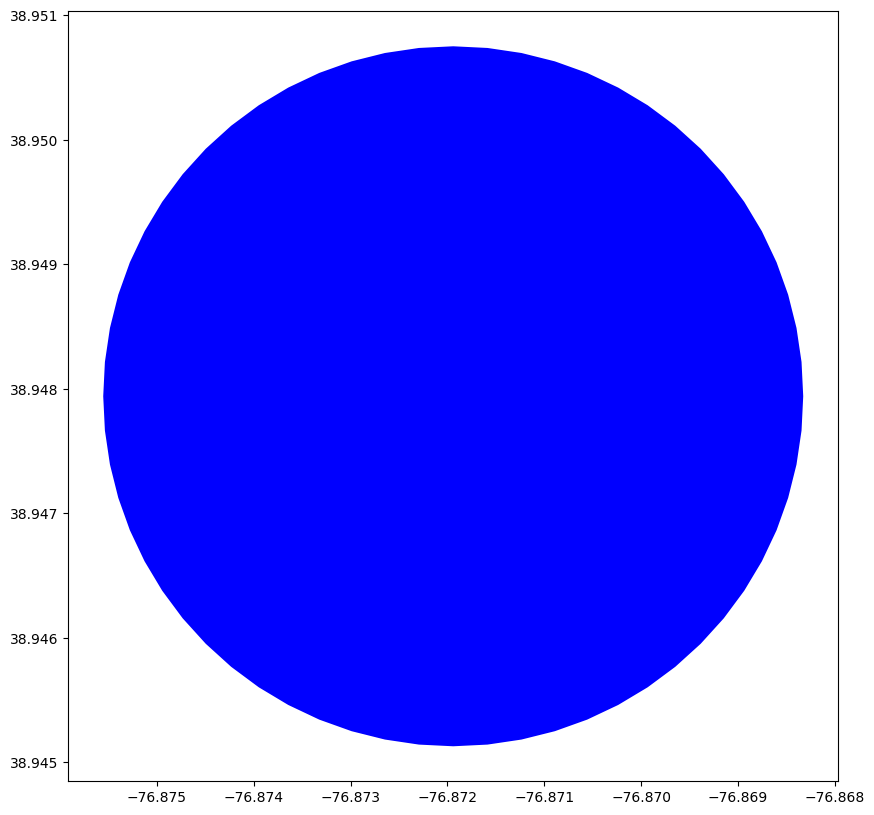

In [99]:
# Select the 2000th facility
facility_2000 = gdf.loc[[2000]]

# Plot the 2000th facility
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
facility_2000.plot(ax=ax, color='blue')
plt.show()

In [108]:
import folium
import geopandas as gpd
import ee

# Load your GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('buffered_stations.geojson')

# Initialize the Earth Engine module.
ee.Initialize()

# Specify the Landsat image collection
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1')

# Assume you want to get an image for the first station in the dataframe
# Create an Earth Engine geometry object from the GeoJSON geometry
aoi = ee.Geometry.Polygon(list(gdf.loc[0, 'geometry'].exterior.coords))

# Filter the Landsat collection to a single image that intersects the polygon
# and was collected closest to a certain date. Adjust the date as needed.
image = landsat.filterBounds(aoi).sort('system:time_start', False).first()

# Define the visualization parameters.
vis_params = {
  'bands': ['B4', 'B3', 'B2'], # These are the RGB bands
  'min': 0,
  'max': 500,
  'gamma': 1.4,
}

# Get the URL for the Google Satellite tile layer
google_satellite_tile = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'

# Use folium to visualize the imagery.
mapid = image.getMapId(vis_params)

map = folium.Map(location=[gdf.loc[1000, 'geometry'].centroid.y, gdf.loc[1000, 'geometry'].centroid.x])

# Create a new TileLayer instance for the Google Satellite layer
tile = folium.TileLayer(
    tiles = google_satellite_tile,
    attr = 'Google',
    name = 'Google Satellite',
    overlay = False
)

# Add the Google Satellite layer to your map
map.add_child(tile)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='median composite',
  ).add_to(map)
map.add_child(folium.LayerControl())
map






In [115]:
import folium
import geopandas as gpd
import ee

# Load your GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('buffered_stations.geojson')

# Initialize the Earth Engine module.
ee.Initialize()

# Specify the Landsat image collection
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1')

# Assume you want to get an image for the first station in the dataframe
# Create an Earth Engine geometry object from the GeoJSON geometry
aoi = ee.Geometry.Polygon(list(gdf.loc[0, 'geometry'].exterior.coords))

# Filter the Landsat collection to a single image that intersects the polygon
# and was collected closest to a certain date. Adjust the date as needed.
image = landsat.filterBounds(aoi).sort('system:time_start', False).first()

# Define the visualization parameters.
vis_params = {
  'bands': ['B5', 'B4', 'B3'], # These are the RGB bands
  'min': 0,
  'max': 500,
  'gamma': 1.4,
}

# Get the URL for the Google Satellite tile layer
google_satellite_tile = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'

# Use folium to visualize the imagery.
mapid = image.getMapId(vis_params)

map = folium.Map(location=[gdf.loc[2000, 'geometry'].centroid.y, gdf.loc[2000, 'geometry'].centroid.x], zoom_start=16)


# Create a new TileLayer instance for the Google Satellite layer
tile = folium.TileLayer(
    tiles = google_satellite_tile,
    attr = 'Google',
    name = 'Google Satellite',
    overlay = False
)

# Add the Google Satellite layer to your map
map.add_child(tile)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='median composite',
  ).add_to(map)
map.add_child(folium.LayerControl())
map






In [130]:
import folium
from folium import Marker, Circle

# Assuming the lat/lon of the station are available in your GeoDataFrame.
# If not, you will have to extract these separately.
lat = gdf.loc[2006, 'geometry'].centroid.y
lon = gdf.loc[2006, 'geometry'].centroid.x

# Set up the map centered around the station
m = folium.Map(location=[lat, lon], zoom_start=16, control_scale=True)


# Add a circle of radius 1/4 mile (in meters) around the station
Circle(location=[lat, lon], radius=402.336).add_to(m)

# Add the satellite image as an overlay
mapid = image.getMapId(vis_params)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='median composite',
).add_to(m)

# Add a layer control panel to the map
m.add_child(folium.LayerControl())

# Display the map
m



